## Quick Links:

1. https://alleninstitute.github.io/abc_atlas_access/notebooks/merfish_tutorial_part_1.html (main tutorial followed)
2. https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html (you will have to setup ccf)
3. https://alleninstitute.github.io/abc_atlas_access/notebooks/merfish_ccf_registration_tutorial.html (the link on their website)
4. see: reference/parcellation.csv
5. https://pmc.ncbi.nlm.nih.gov/articles/PMC6787288/ (some random study with serial two-photon tomography)
6. https://alleninstitute.github.io/abc_atlas_access/notebooks/abc_atlas_selection_example.html
7. https://knowledge.brain-map.org/abcatlas#AQEBSzlKTjIzUDI0S1FDR0s5VTc1QQACSFNZWlBaVzE2NjlVODIxQldZUAADBwFGUzAwRFhWMFQ5UjFYOUZKNFFFAAIAAAFRWTVTOEtNTzVITEpVRjBQMDBLAAIBMDIyIEw1IEVUIENUWCBHbHV0AAABMTVCSzQ3RENJT0YxU0xMVVc5UAACAAABQ0JHQzBVMzBWVjlKUFI2MFRKVQACAAABNzNHVlREWERFR0UyN00yWEpNVAACAAABSTlMTlAwTzFSTjhLNFNOMkdXWQACAVZJU3BtAAABVEZRRkxORVAzVjIyMlk4OEM2NAACAAAEAQAChexuHYN%2B0KIDhAo%2BJYNCd2oEMk5RVElFN1RBTVA4UFFBSE80UAAFga%2BmSoHprA6BoIFHgJLV6AYABwAABQAGAQECRlMwMERYVjBUOVIxWDlGSjRRRQADfgAAAAQAAAhWRk9GWVBGUUdSS1VEUVVaM0ZGAAlMVkRCSkFXOEJJNVlTUzFRVUJHAAoACwFUTE9LV0NMOTVSVTAzRDlQRVRHAAI3M0dWVERYREVHRTI3TTJYSk1UAAMBBAEAAiMwMDAwMDAAA8gBAAUBAQIjMDAwMDAwAAPIAQAAAAIBAA%3D%3D (helps in visualizing the certain supertype like L5.ET.CTX.Glut - just to get an understanding of what we are trying to search for in this notebook)
8. https://alleninstitute.github.io/abc_atlas_access/descriptions/notebook_subtitle3.html (this is helpful because this all the merfish tutorials are lited on this one page - although I roughly went through all of them I only found the first one helpful)

## Steps Taken:

1. Running the steps in the getting started file: https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html
2. Running the steps in the tutorial: https://alleninstitute.github.io/abc_atlas_access/notebooks/merfish_tutorial_part_1.html
3. Realizing somewhere in between I can find L6.CT.CTX.Glut in the files so writing code to plot required sections
4. Merging the STPT code to count the cells highlighted in a specific region

In [1]:
# make the below code blacks again if you are running this file the first time :)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from pathlib import Path

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [3]:
df = pd.read_excel("MapMySections_EntrantData.xlsx", sheet_name="Column Descriptions")
cell_supertypes = df["Column Name"][9:].tolist()
print(cell_supertypes)

['ABC.NN', 'Astro.TE.NN', 'CLA.EPd.CTX.Car3.Glut', 'Endo.NN', 'L2.3.IT.CTX.Glut', 'L4.5.IT.CTX.Glut', 'L5.ET.CTX.Glut', 'L5.IT.CTX.Glut', 'L5.NP.CTX.Glut', 'L6.CT.CTX.Glut', 'L6.IT.CTX.Glut', 'L6b.CTX.Glut', 'Lamp5.Gaba', 'Lamp5.Lhx6.Gaba', 'Lymphoid.NN', 'Microglia.NN', 'OPC.NN', 'Oligo.NN', 'Peri.NN', 'Pvalb.Gaba', 'Pvalb.chandelier.Gaba', 'SMC.NN', 'Sncg.Gaba', 'Sst.Chodl.Gaba', 'Sst.Gaba', 'VLMC.NN', 'Vip.Gaba']


In [4]:
download_base = Path('../../data/abc_atlas')
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20250531/manifest.json'

In [5]:
cell = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850',
    file_name='cell_metadata',
    dtype={"cell_label": str}
)
cell.set_index('cell_label', inplace=True)
print("Number of cells = ", len(cell))
cell.head(5)

Number of cells =  3938808


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,abc_sample_id
cell_label,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,c9881423-76a7-4835-ba8b-7942fd384b6b
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,aa815488-6487-4e47-8a5e-d82ac9933bc6
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,91ef7a85-8e3e-4410-8ee2-785788df3ebe
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,18991e17-fbd3-4ba0-9c60-1281f56ac520
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,5e155936-e40d-4c6b-8971-e7fb0079274b


In [6]:
def print_column_info(df):
    for c in df.columns:
        grouped = df[[c]].groupby(c).count()
        members = ''
        if len(grouped) < 30:
            members = str(list(grouped.index))
        print("Number of unique %s = %d %s" % (c,len(grouped), members))

print_column_info(cell)

Number of unique brain_section_label = 59 
Number of unique cluster_alias = 5320 
Number of unique average_correlation_score = 3932069 
Number of unique feature_matrix_label = 1 ['C57BL6J-638850']
Number of unique donor_label = 1 ['C57BL6J-638850']
Number of unique donor_genotype = 1 ['wt/wt']
Number of unique donor_sex = 1 ['M']
Number of unique x = 3938808 
Number of unique y = 3938808 
Number of unique z = 59 
Number of unique abc_sample_id = 3938808 


In [7]:
cluster_details = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership_pivoted',
    keep_default_na=False
)
cluster_details.set_index('cluster_alias', inplace=True)
cluster_details

,neurotransmitter,class,subclass,supertype,cluster
cluster_alias,,,,,
1,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3
2,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0327 L2 IT PPP-APr Glut_3
3,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0322 L2 IT PPP-APr Glut_2
4,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0323 L2 IT PPP-APr Glut_2
5,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0325 L2 IT PPP-APr Glut_2
...,...,...,...,...,...
34368,GABA-Glyc,27 MY GABA,288 MDRN Hoxb5 Ebf2 Gly-Gaba,1102 MDRN Hoxb5 Ebf2 Gly-Gaba_1,4955 MDRN Hoxb5 Ebf2 Gly-Gaba_1
34372,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4901 MY Lhx1 Gly-Gaba_3
34374,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4902 MY Lhx1 Gly-Gaba_3


In [8]:
print(cluster_details["supertype"].tolist()[:10])

['0082 L2 IT PPP-APr Glut_3', '0082 L2 IT PPP-APr Glut_3', '0081 L2 IT PPP-APr Glut_2', '0081 L2 IT PPP-APr Glut_2', '0081 L2 IT PPP-APr Glut_2', '0080 L2 IT PPP-APr Glut_1', '0080 L2 IT PPP-APr Glut_1', '0080 L2 IT PPP-APr Glut_1', '0080 L2 IT PPP-APr Glut_1', '0083 L2 IT PPP-APr Glut_4']


In [9]:
cluster_details["supertype_edited"] = cluster_details["supertype"].apply(
    lambda x: ".".join(x[5:].split(" "))
)

In [10]:
cluster_colors = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_to_cluster_annotation_membership_color')
cluster_colors.set_index('cluster_alias', inplace=True)
cluster_colors

,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cluster_alias,,,,,
1,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F
2,#2B93DF,#FA0087,#0F6632,#266DFF,#CCA73D
3,#2B93DF,#FA0087,#0F6632,#002BCC,#99000D
4,#2B93DF,#FA0087,#0F6632,#002BCC,#5C8899
5,#2B93DF,#FA0087,#0F6632,#002BCC,#473D66
...,...,...,...,...,...
34368,#820e57,#0096C7,#660038,#5CCCA4,#500099
34372,#820e57,#0096C7,#f20985,#976df9,#0F6627
34374,#820e57,#0096C7,#f20985,#976df9,#2E4799


In [11]:
cell_extended = cell.join(cluster_details, on='cluster_alias')
cell_extended = cell_extended.join(cluster_colors, on='cluster_alias')
cell_extended.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,class,subclass,supertype,cluster,supertype_edited,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,04 DG-IMN Glut,038 DG-PIR Ex IMN,0141 DG-PIR Ex IMN_2,0515 DG-PIR Ex IMN_2,DG-PIR.Ex.IMN_2,#666666,#16f2f2,#3D53CC,#CC7A3D,#73FFBF
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63


In [12]:
def plot_section(xx, yy, cc = None, val = None, fig_width = 8, fig_height = 8, cmap = None):
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    if cmap is not None:
        plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None:
        plt.scatter(xx, yy, s=0.5, color=cc, marker='.')
    ax.set_ylim(11, 0)
    ax.set_xlim(0, 11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return fig, ax

ABC.NN
Number of cells with ABC.NN in supertype_edited: 20989


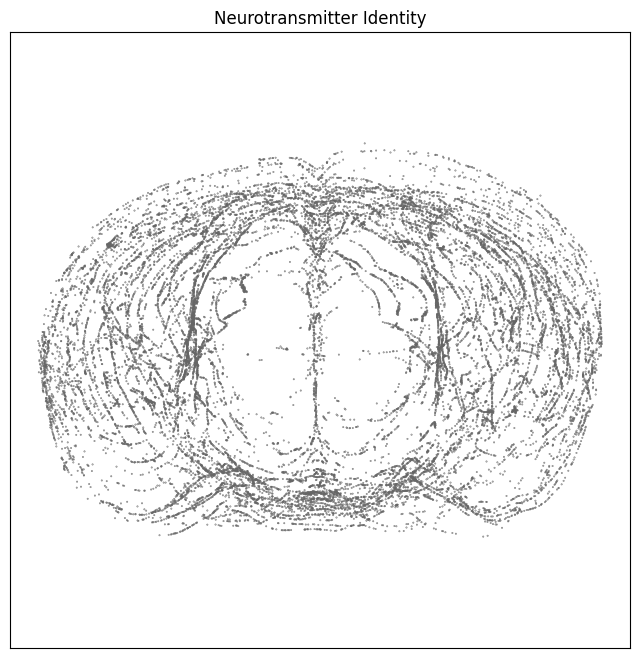

In [13]:
def plot_cell_supertype(idx_cell_supertype=0):
    """
    Plot cells of a specific supertype from cell_extended data.
    
    Parameters:
    cell_extended (DataFrame): DataFrame containing cell data
    cell_supertypes (list): List of cell supertypes
    idx_cell_supertype (int): Index of the supertype to plot (default: 0)
    
    Returns:
    matplotlib.figure.Figure: The generated plot
    """
    print(cell_supertypes[idx_cell_supertype])
    pred = cell_extended['supertype_edited'].str.contains(cell_supertypes[idx_cell_supertype], na=False)
    section = cell_extended[pred]
    print(f"Number of cells with {cell_supertypes[idx_cell_supertype]} in supertype_edited:", len(section))
    
    fig, ax = plot_section(section['x'], section['y'], section['neurotransmitter_color'])
    ax.set_title("Neurotransmitter Identity")
    plt.show()

plot_cell_supertype(0)

ABC.NN
Number of cells with ABC.NN in supertype_edited: 20989


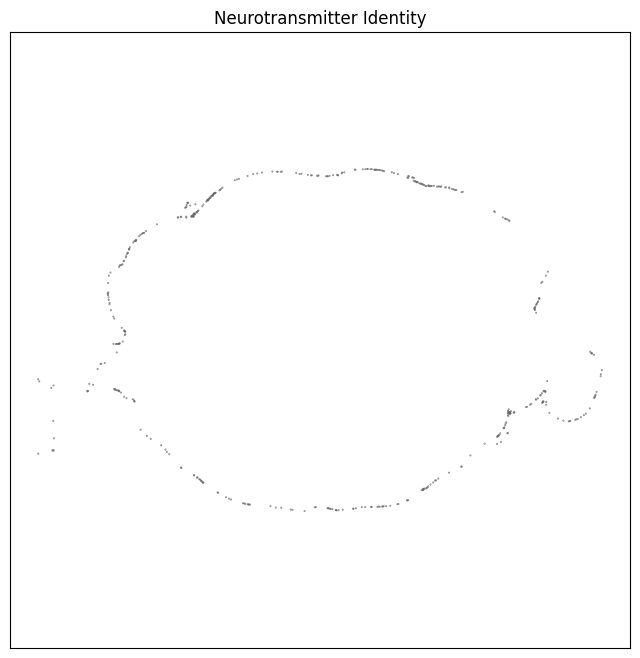

In [14]:
def plot_section_with_z(xx, yy, zz, z_value, cc=None, val=None, fig_width=8, fig_height=8, cmap=None):
    """
    Plot cells at a specific z-axis value.
    
    Parameters:
    xx (array-like): x coordinates
    yy (array-like): y coordinates
    zz (array-like): z coordinates
    z_value (float): Specific z-value to plot
    cc (array-like, optional): Color values for points
    val (array-like, optional): Values for colormap
    fig_width (float): Figure width in inches
    fig_height (float): Figure height in inches
    cmap (str or Colormap, optional): Colormap for scatter plot
    
    Returns:
    matplotlib.figure.Figure, matplotlib.axes.Axes: The figure and axes objects
    """
    # Filter data based on z_value
    mask = (zz == z_value)
    xx_filtered = xx[mask]
    yy_filtered = yy[mask]
    cc_filtered = cc[mask] if cc is not None else None
    val_filtered = val[mask] if val is not None else None
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    
    if cmap is not None and val_filtered is not None:
        plt.scatter(xx_filtered, yy_filtered, s=0.5, c=val_filtered, marker='.', cmap=cmap)
    elif cc_filtered is not None:
        plt.scatter(xx_filtered, yy_filtered, s=0.5, color=cc_filtered, marker='.')
    
    ax.set_ylim(11, 0)
    ax.set_xlim(0, 11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax
    
def plot_cell_supertype_with_z(idx_cell_supertype=0, z_value=None):
    """
    Plot cells of a specific supertype from cell_extended data at a specific z-axis value.
    
    Parameters:
    idx_cell_supertype (int): Index of the supertype to plot (default: 0)
    z_value (float, optional): Specific z-value to plot (default: None)
    
    Returns:
    matplotlib.figure.Figure: The generated plot
    """
    print(cell_supertypes[idx_cell_supertype])
    pred = cell_extended['supertype_edited'].str.contains(cell_supertypes[idx_cell_supertype], na=False)
    section = cell_extended[pred]
    print(f"Number of cells with {cell_supertypes[idx_cell_supertype]} in supertype_edited:", len(section))
    
    fig, ax = plot_section_with_z(
        xx=section['x'], 
        yy=section['y'], 
        zz=section['z'],
        z_value=z_value,
        cc=section['neurotransmitter_color']
    )
    ax.set_title("Neurotransmitter Identity")
    plt.show()
    
    return fig

# Call the function
fig = plot_cell_supertype_with_z(idx_cell_supertype=0, z_value=3)  # Example z_value=1

In [15]:
cell_extended.columns

Index(['brain_section_label', 'cluster_alias', 'average_correlation_score',
       'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex',
       'x', 'y', 'z', 'abc_sample_id', 'neurotransmitter', 'class', 'subclass',
       'supertype', 'cluster', 'supertype_edited', 'neurotransmitter_color',
       'class_color', 'subclass_color', 'supertype_color', 'cluster_color'],
      dtype='object')

In [16]:
cell_extended.iloc[1]

brain_section_label                             C57BL6J-638850.26
cluster_alias                                                4218
average_correlation_score                                 0.64118
feature_matrix_label                               C57BL6J-638850
donor_label                                        C57BL6J-638850
donor_genotype                                              wt/wt
donor_sex                                                       M
x                                                        5.064889
y                                                        7.309543
z                                                             4.2
abc_sample_id                aa815488-6487-4e47-8a5e-d82ac9933bc6
neurotransmitter                                             Glut
class                                                   23 P Glut
subclass                                 235 PG-TRN-LRN Fat2 Glut
supertype                             0953 PG-TRN-LRN Fat2 Glut_1
cluster   

In [17]:
reconstructed_coords = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850-CCF',
    file_name='reconstructed_coordinates',
    dtype={"cell_label": str}
)
reconstructed_coords.rename(columns={'x': 'x_reconstructed',
                                     'y': 'y_reconstructed',
                                     'z': 'z_reconstructed'},
                            inplace=True)
reconstructed_coords.set_index('cell_label', inplace=True)
reconstructed_coords.head(5)

,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,
1019171911101460569,7.143894,7.890964,0.8,945
1019171911101550321,4.188673,7.962972,0.8,945
1019171911100841066,6.859447,5.908534,0.8,893
1019171911101400425,3.952014,7.564086,0.8,842
1019171911101380264,2.803546,7.221688,0.8,0


In [18]:
cell_extended = cell_extended.join(reconstructed_coords, how='inner')
cell_extended

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,supertype_edited,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,DG-PIR.Ex.IMN_2,#666666,#16f2f2,#3D53CC,#CC7A3D,#73FFBF,7.255606,4.007680,6.6,1160
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,5.036436,7.264429,4.2,564
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,5.784270,8.007646,4.0,761
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,3.161528,5.719814,2.4,718
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,5.618763,7.847877,4.4,761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,0.574988,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.560003,4.669243,8.8,...,Endo.NN_1,#666666,#858881,#994567,#00992A,#5C9994,1.611688,4.293542,8.8,828
1017165415100930567,C57BL6J-638850.57,5254,0.620546,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.032556,3.695696,11.0,...,Endo.NN_1,#666666,#858881,#994567,#00992A,#FFB473,5.178917,3.780218,11.0,1004
1017155956102610748,C57BL6J-638850.49,5254,0.548053,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.549142,4.231188,9.2,...,Endo.NN_1,#666666,#858881,#994567,#00992A,#FFB473,2.674074,4.251416,9.2,1091


In [19]:
ccf_coords = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850-CCF',
    file_name='ccf_coordinates',
    dtype={"cell_label": str}
)
ccf_coords.rename(columns={'x': 'x_ccf',
                           'y': 'y_ccf',
                           'z': 'z_ccf'},
                  inplace=True)
ccf_coords.drop(['parcellation_index'], axis=1, inplace=True)
ccf_coords.set_index('cell_label', inplace=True)
ccf_coords.head(5)

,x_ccf,y_ccf,z_ccf
cell_label,,,
1019171911101460569,12.282330,6.987808,7.385773
1019171911101550321,12.192214,7.002155,4.366855
1019171911100841066,12.500341,4.750392,7.074634
1019171911101400425,12.231647,6.544816,4.128568
1019171911101380264,12.238502,6.135836,2.948194


In [20]:
cell_extended = cell_extended.join(ccf_coords, how='inner')
cell_extended

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,subclass_color,supertype_color,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,x_ccf,y_ccf,z_ccf
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,#3D53CC,#CC7A3D,#73FFBF,7.255606,4.007680,6.6,1160,7.495417,2.445872,7.455066
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,#9B7ACC,#990041,#663D63,5.036436,7.264429,4.2,564,9.227966,6.133693,5.225024
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,#9B7ACC,#990041,#663D63,5.784270,8.007646,4.0,761,9.344912,6.989939,6.002664
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,#9B7ACC,#990041,#663D63,3.161528,5.719814,2.4,718,10.977068,4.398568,3.305223
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,#9B7ACC,#990041,#663D63,5.618763,7.847877,4.4,761,8.997138,6.798329,5.827197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,0.574988,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.560003,4.669243,8.8,...,#994567,#00992A,#5C9994,1.611688,4.293542,8.8,828,5.321669,2.575568,1.694437
1017165415100930567,C57BL6J-638850.57,5254,0.620546,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.032556,3.695696,11.0,...,#994567,#00992A,#FFB473,5.178917,3.780218,11.0,1004,3.493405,2.016746,5.317544
1017155956102610748,C57BL6J-638850.49,5254,0.548053,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.549142,4.231188,9.2,...,#994567,#00992A,#FFB473,2.674074,4.251416,9.2,1091,4.994629,2.542668,2.773582


In [30]:
def plot_section(xx=None, yy=None, cc=None, val=None, pcmap=None, 
                 overlay=None, extent=None, bcmap=plt.cm.Greys_r, alpha=1.0,
                 fig_width = 6, fig_height = 6):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    if xx is not None and yy is not None and pcmap is not None:
        plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=pcmap)
    elif xx is not None and yy is not None and cc is not None:
        plt.scatter(xx, yy, s=0.5, color=cc, marker='.', zorder=1)   
        
    if overlay is not None and extent is not None and bcmap is not None:
        plt.imshow(overlay, cmap=bcmap, extent=extent, alpha=alpha, zorder=2)
        
    ax.set_ylim(11, 0)
    ax.set_xlim(0, 11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

In [31]:
abc_cache.list_data_files('MERFISH-C57BL6J-638850-CCF')

['resampled_annotation',
 'resampled_annotation_boundary',
 'resampled_average_template']

In [32]:
print("reading resampled_average_template")
file = abc_cache.get_data_path(directory='MERFISH-C57BL6J-638850-CCF',
                               file_name='resampled_average_template')
average_template_image = sitk.ReadImage(file)
average_template_array = sitk.GetArrayViewFromImage(average_template_image)

print("reading resampled_annotation")
file = abc_cache.get_data_path(directory='MERFISH-C57BL6J-638850-CCF',
                               file_name='resampled_annotation')
annotation_image = sitk.ReadImage(file)
annotation_array = sitk.GetArrayViewFromImage(annotation_image)

print("reading resampled_annotation_boundary")
file = abc_cache.get_data_path(directory='MERFISH-C57BL6J-638850-CCF',
                               file_name='resampled_annotation_boundary')
annotation_boundary_image = sitk.ReadImage(file)
annotation_boundary_array = sitk.GetArrayViewFromImage(annotation_boundary_image)

reading resampled_average_template
reading resampled_annotation
reading resampled_annotation_boundary


In [33]:
size = average_template_image.GetSize()
spacing = average_template_image.GetSpacing()
extent = (-0.5 * spacing[0], (size[0]-0.5) * spacing[0], (size[1]-0.5) * spacing[1], -0.5 * spacing[1])

In [34]:
pred = (cell_extended['brain_section_label'] == "C57BL6J-638850.40")
section = cell_extended[pred]
print(len(section))

104572


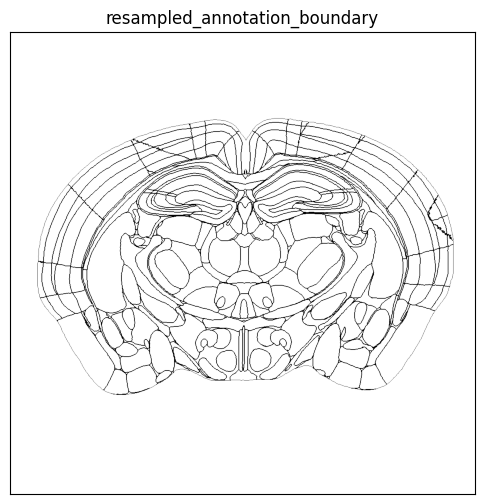

In [35]:
zindex = int(section.iloc[0]['z_reconstructed'] / 0.2)
boundary_slice = annotation_boundary_array[zindex, :, :]
fig, ax = plot_section(overlay=boundary_slice, bcmap=plt.cm.Greys, extent=extent)
res = ax.set_title('resampled_annotation_boundary')
plt.show()

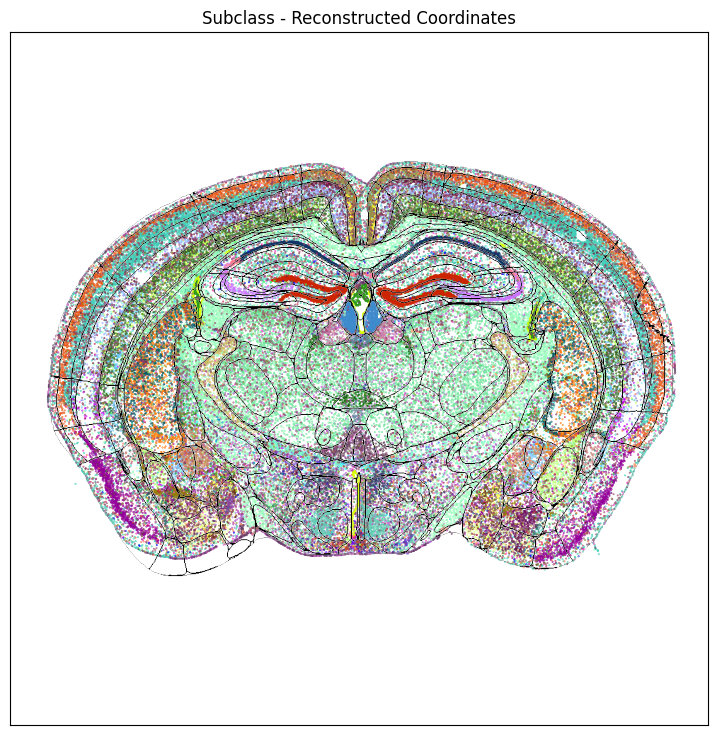

In [36]:
fig, ax = plot_section(section['x_reconstructed'],
                       section['y_reconstructed'], 
                       cc=section['subclass_color'],
                       overlay=boundary_slice,
                       extent=extent, 
                       bcmap=plt.cm.Greys,
                       alpha = 1.0*(boundary_slice>0),
                       fig_width = 9,
                       fig_height = 9 )
res = ax.set_title("Subclass - Reconstructed Coordinates")
plt.show()